<a href="https://colab.research.google.com/github/blackscreen-whitetext/AIDS/blob/main/UMC301_Assignment_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMC 301: Applied Data Science and Artificial Intelligence
## Assignment 1a

### Submission instructions:


1.   The assignment is to be submitted in ONE single notebook.
2.   Submit the .ipynb file and pdf of the same with all cells open through this Teams Assignment.
3. If your IISc email ID is < username > @iisc.ac.in, then name the file < username >_Assgn_1a. E.g. jonathan_Assgn_1a for email ID jonathan@iisc.ac.in.
4. Before submission, execute the ’Restart session and run all’ option from the Runtime/Kernel tab. Verify that there are no errors and that you are getting the output you expect.
5. Use the dataset **'SeoulBikeData.csv'**: https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1
6. Use significance level $\alpha = 0.05$ for all questions.
7. Calculate the hypothesis test statistics (stat_value, p_value, dof etc.) using equations and validate using the inbuit python functions.

In [20]:
import pandas
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f,t

In [3]:
data = pandas.read_csv('SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Question 1
Test if the mean of hourly bike rentals reduces if "Snowfall" is non zero in winter season. Use entire winter data from 'SeoulBikeData.csv'. Choose appropriate hypothesis test.

In [4]:
data_= data[(data["Seasons"] == "Winter")]
data_with_snow = data_[(data_["Snowfall (cm)"] > 0)]
data_wo_snow = data_[(data_["Snowfall (cm)"] == 0)]

In [5]:
mean_with_snow = data_with_snow["Rented Bike Count"].mean()
mean_wo_snow = data_wo_snow["Rented Bike Count"].mean()
sd_with_snow = data_with_snow["Rented Bike Count"].std()
sd_wo_snow = data_wo_snow["Rented Bike Count"].std()
z = (mean_with_snow - mean_wo_snow) / ((sd_with_snow**2/len(data_with_snow)) + (sd_wo_snow**2/len(data_wo_snow)))**0.5
p_value = 2*norm.cdf(-abs(z))

In [23]:
t_stat, p_val = stats.ttest_ind(data_with_snow["Rented Bike Count"], data_wo_snow["Rented Bike Count"])
def two_sample_ttest(list1, list2):
    # Number of observations in each list
    n1 = len(list1)
    n2 = len(list2)
    
    # Calculate the means of each list
    mean1 = np.mean(list1)
    mean2 = np.mean(list2)
    
    # Calculate the variances of each list
    var1 = np.var(list1, ddof=1)  # Sample variance (ddof=1)
    var2 = np.var(list2, ddof=1)
    
    # Calculate the pooled variance
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    
    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / np.sqrt(pooled_var * (1/n1 + 1/n2))
    
    # Degrees of freedom
    df = n1 + n2 - 2
    
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))
    
    return t_stat, p_value
t_stat,p =two_sample_ttest(data_with_snow["Rented Bike Count"], data_wo_snow["Rented Bike Count"])
print("T-statistic: ", t_stat)
print(f"P-value: {p:.4e}")
print("z-statistic: ", z)
print("p-value: ", p_value)
print("t-statistic_built_in: ", t_stat)
print("p-value_built_in: ", p_val)

T-statistic:  -10.163358641541603
P-value: 0.0000e+00
z-statistic:  -12.587491780039079
p-value:  2.4741057258547496e-36
t-statistic:  -10.163358641541603
p-value:  9.799394129697895e-24


Since p-value from both z and t tests are very low compared to the significance level, it suffices to say that we can reject the null hypothesis. Thus the hourly bike rentals have reduced as can be seen with the statistics taking negative values. 

# Question 2

Visualize the hourly non-zero rainfall distribution and identify four quartiles. Test if the mean hourly count of bike rentals in the four quartiles are different using 1 way ANOVA test.

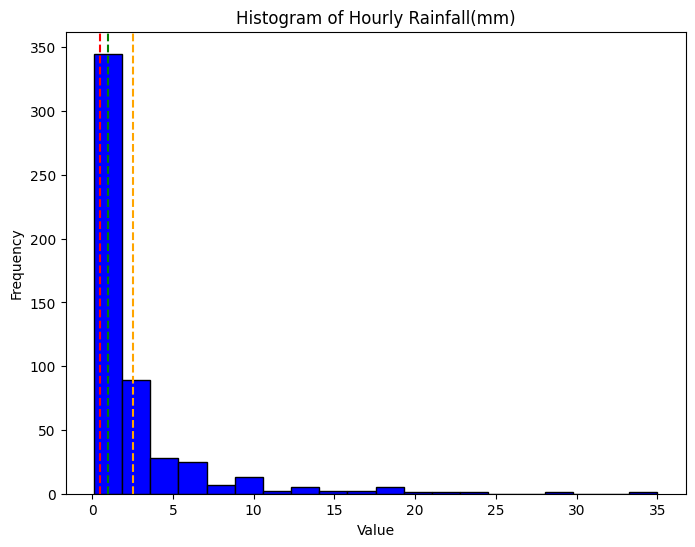

In [7]:
data_non_zero_rainfall = data[(data["Rainfall(mm)"] > 0)]
Q1,Q2,Q3 = np.percentile(data_non_zero_rainfall["Rainfall(mm)"], [25, 50, 75]).tolist()
plt.figure(figsize=(8, 6))
plt.hist(data_non_zero_rainfall["Rainfall(mm)"], bins=20, color='blue', edgecolor='black')
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='orange', linestyle='--', label=f'Q3 (75th percentile): {Q3:.2f}')
plt.title('Histogram of Hourly Rainfall(mm)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [25]:
Q1,Q2,Q3
quar1 = (data_non_zero_rainfall.loc[data_non_zero_rainfall["Rainfall(mm)"] <= Q1, "Rented Bike Count"]).reset_index(drop=True).tolist()
quar2 = (data_non_zero_rainfall.loc[(data_non_zero_rainfall["Rainfall(mm)"] > Q1) & (data_non_zero_rainfall["Rainfall(mm)"] <= Q2), "Rented Bike Count"]).reset_index(drop=True).tolist()
quar3 = (data_non_zero_rainfall.loc[(data_non_zero_rainfall["Rainfall(mm)"] > Q2) & (data_non_zero_rainfall["Rainfall(mm)"] <= Q3), "Rented Bike Count"]).reset_index(drop=True).tolist()
quar4 = (data_non_zero_rainfall.loc[data_non_zero_rainfall["Rainfall(mm)"] > Q3, "Rented Bike Count"]).reset_index(drop=True).tolist()
print("Built_in f statistic and p value", stats.f_oneway(quar1, quar2, quar3, quar4))

def one_way_anova(*groups):
    # Number of groups
    k = len(groups)
    
    # Number of observations
    n = sum([len(group) for group in groups])
    
    # Overall mean
    overall_mean = np.mean([value for group in groups for value in group])
    
    # Calculate SSB (Sum of Squares Between)
    ssb = sum([len(group) * (np.mean(group) - overall_mean)**2 for group in groups])
    
    # Calculate SSW (Sum of Squares Within)
    ssw = sum([sum((group - np.mean(group))**2) for group in groups])
    
    # Degrees of freedom
    dfb = k - 1       # Between-groups degrees of freedom
    dfw = n - k       # Within-groups degrees of freedom
    
    # Mean square
    msb = ssb / dfb   # Mean Square Between
    msw = ssw / dfw   # Mean Square Within
    
    # F-statistic
    f_stat = msb / msw
    
    # Calculate p-value
    p_value = 1 - f.cdf(f_stat, dfb, dfw)
    
    return f_stat, p_value
print("f statistic, p value:",one_way_anova(quar1,quar2,quar3,quar4))

Built_in f statistic and p value F_onewayResult(statistic=np.float64(12.763393537618176), pvalue=np.float64(4.6219482371881094e-08))
f statistic, p value: (np.float64(12.763393537618171), np.float64(4.621948235250528e-08))


Conclusion: The means of at least 2 of the 4 groups are different. Since the p-value is low compared to the significance level the null hypothesis that is "All means are the same" has to be rejected.

# Question 3
Visualize the average hourly bike rentals in Summer Season and Spring Season. Identify if the two distributions are different using Chi-squared test.

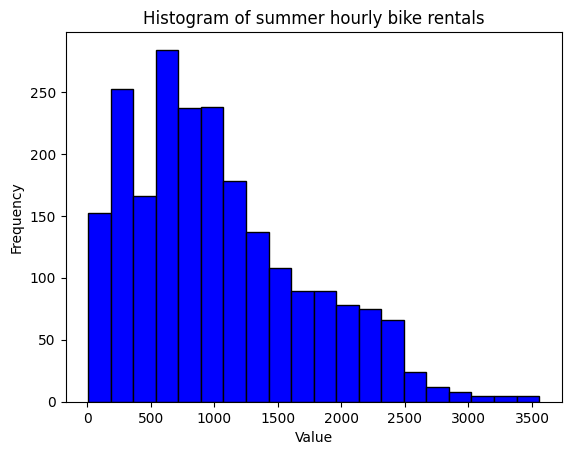

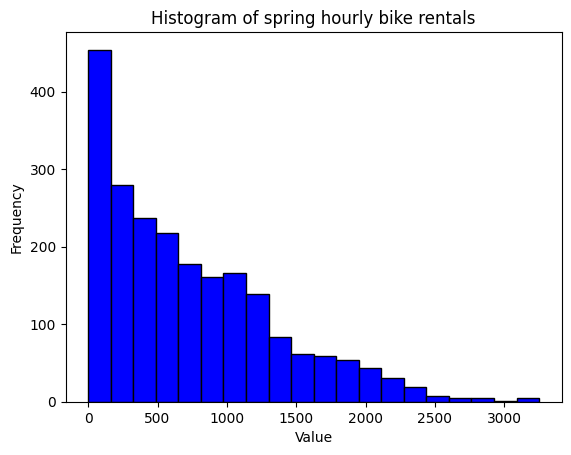

In [29]:
data_summer = data[(data["Seasons"] == "Summer")]
data_spring = data[(data["Seasons"] == "Spring")]
plt.hist(data_summer["Rented Bike Count"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of summer hourly bike rentals')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
plt.hist(data_spring["Rented Bike Count"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of spring hourly bike rentals')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [32]:
import numpy as np
from scipy.stats import chi2

def chi2_contingency_manual(contingency_table, correction=False):
    # Sum of the contingency table
    total = np.sum(contingency_table)
    
    # Row and column sums
    row_sums = np.sum(contingency_table, axis=1)
    col_sums = np.sum(contingency_table, axis=0)
    
    # Calculate expected frequencies
    expected = np.outer(row_sums, col_sums) / total
    
    # Chi-square statistic
    chi2_stat = np.sum((contingency_table - expected) ** 2 / expected)
    
    # Degrees of freedom: (number of rows - 1) * (number of columns - 1)
    df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    
    # Calculate the p-value
    p_value = 1 - chi2.cdf(chi2_stat, df)
    
    return chi2_stat, p_value, df, expected
def chi_squared_test(data_summer, data_spring, n_bins=10):    
    #data_max = max(data_summer["Rented Bike Count"].max(), data_spring["Rented Bike Count"].max())
    bins = np.percentile(np.concatenate([data_summer["Rented Bike Count"], data_spring["Rented Bike Count"]]), np.linspace(0, 100, n_bins+1))  
    #print(bins)  
    # print(combined_data)
    # bins = np.linspace(0, data_max, n_bins+1)
    hist_summer, _ = np.histogram(data_summer["Rented Bike Count"], bins=bins)
    hist_spring, _ = np.histogram(data_spring["Rented Bike Count"], bins=bins)
    
    # Create a contingency table
    contingency_table = np.vstack([hist_summer, hist_spring]).T

    # Perform Chi-Squared Test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
    return chi2_stat, p_value, dof, expected
for i in range(5, 100, 5):
    try:
        chi2_stat, p_value, dof, expected = chi_squared_test(data_summer, data_spring, n_bins=i)
        print(f"Chi-Squared Test with {i} bins:")
        print("p value: ", p_value)
        print("dof: ", dof)
    except:
        break
    


Chi-Squared Test with 5 bins:
p value:  1.6504407200446134e-62
dof:  4
Chi-Squared Test with 10 bins:
p value:  1.9437974018400605e-63
dof:  9
Chi-Squared Test with 15 bins:
p value:  1.757015179681642e-65
dof:  14
Chi-Squared Test with 20 bins:
p value:  2.867630644165031e-63
dof:  19
Chi-Squared Test with 25 bins:
p value:  5.033113053656802e-61
dof:  24
Chi-Squared Test with 30 bins:
p value:  8.418081038310366e-60
dof:  29
Chi-Squared Test with 35 bins:
p value:  5.62833486545816e-57
dof:  34
Chi-Squared Test with 40 bins:
p value:  3.1749363726625865e-56
dof:  39
Chi-Squared Test with 45 bins:
p value:  1.1156253206689015e-56
dof:  44
Chi-Squared Test with 50 bins:
p value:  7.758945175840271e-55
dof:  49
Chi-Squared Test with 55 bins:
p value:  8.869323497913654e-51
dof:  54
Chi-Squared Test with 60 bins:
p value:  2.220447945406296e-51
dof:  59
Chi-Squared Test with 65 bins:
p value:  3.5548240957087426e-50
dof:  64
Chi-Squared Test with 70 bins:
p value:  1.7694043176244943e-50

As can be seen from very few to very high number of bins, the p value is negligible compared to the significance level and the null hypothesis must be rejected, that is the distributions of hourly bike rentals in the spring and summer don't have the same distribution.